In [1]:
import sys, pickle #, cPickle
import sklearn.preprocessing as pre, scipy, numpy as np, matplotlib.pyplot as plt, glob, pyemma as py, sys, os, subprocess
import pandas as pd, seaborn as sns, argparse, glob


(4, 6) (4, 6)
['inter + intra', 'inter', 'inter symmetrized'] ['inter + intra (recip)', 'inter (recip)', 'inter symmetrized (recip)']


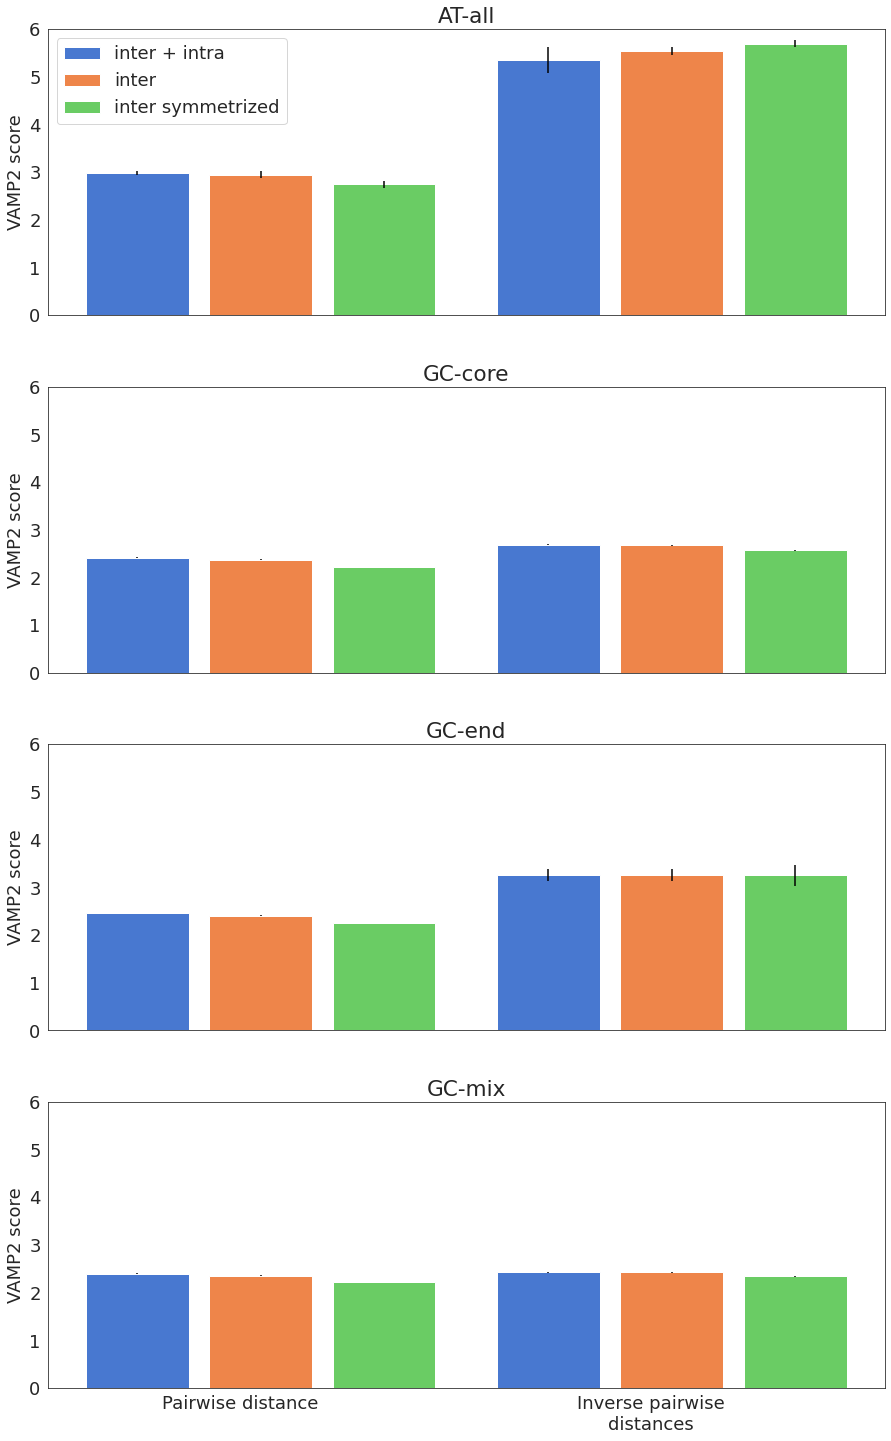

In [6]:
sns.set_style('white')
sns.set_palette('muted')
plt.rcParams['font.size'] = 18
colors = ['blue', 'orange', 'green']
seq_list = ['AT-all', 'GC-core', 'GC-end', 'GC-mix']

# load scores and errors

load_dir = 'nonpermute_scores/'
score_fs = sorted(glob.glob(f'{load_dir}*_scores.npy'))
error_fs = sorted(glob.glob(f'{load_dir}*_errors.npy'))

scores = [np.load(open(fs, 'rb')) for fs in score_fs]
errors = [np.load(open(fs, 'rb')) for fs in error_fs]

print(np.shape(scores), np.shape(errors))

# define score order for easier viewing
p_pwd = [0, 2, 4]
p_inv = [1, 3, 5]

labels = ['inter + intra', 'inter', 'inter symmetrized']
rep_labels = [label + ' (recip)' for label in labels]
all_labels = print(labels, rep_labels)

ind = np.arange(2)  # the x locations for the groups
width = 0.25  # the width of the bars

fig, axes = plt.subplots(4, figsize=(15, 25), sharex=True, sharey=True)

for y in range(4):
    
    ax=axes[y]
    ax.set_title(seq_list[y])
    
    rect_list = []
    for i, label in enumerate(labels):
        
        sy, ey  = scores[y][2*i:2*(i+1)], errors[y][2*i:2*(i+1)]
        rect_list.append( ax.bar(ind + width*i*1.2, sy, width, yerr=ey, label=label) )
        
    axes[0].legend()
    ax.set_ylabel("VAMP2 score")
    ax.set_ylim(0, 6)
    ax.set_xticks(ind+width*1)
    ax.set_xticklabels(('Pairwise distance', 'Inverse pairwise\ndistances'))
    
ax.set_xticklabels(('Pairwise distance', 'Inverse pairwise\ndistances'))

plt.subplots_adjust(hspace=0.25)
plt.savefig(f'../../paper_figs/all_permute_vamps_nolegend', dpi=300, bbox_inches='tight')

(4, 6) (4, 6)
['inter + intra', 'inter', 'inter \nsymmetrized', 'inter + intra\n(recip)', 'inter\n(recip)', 'inter \nsymmetrized\n(recip)']


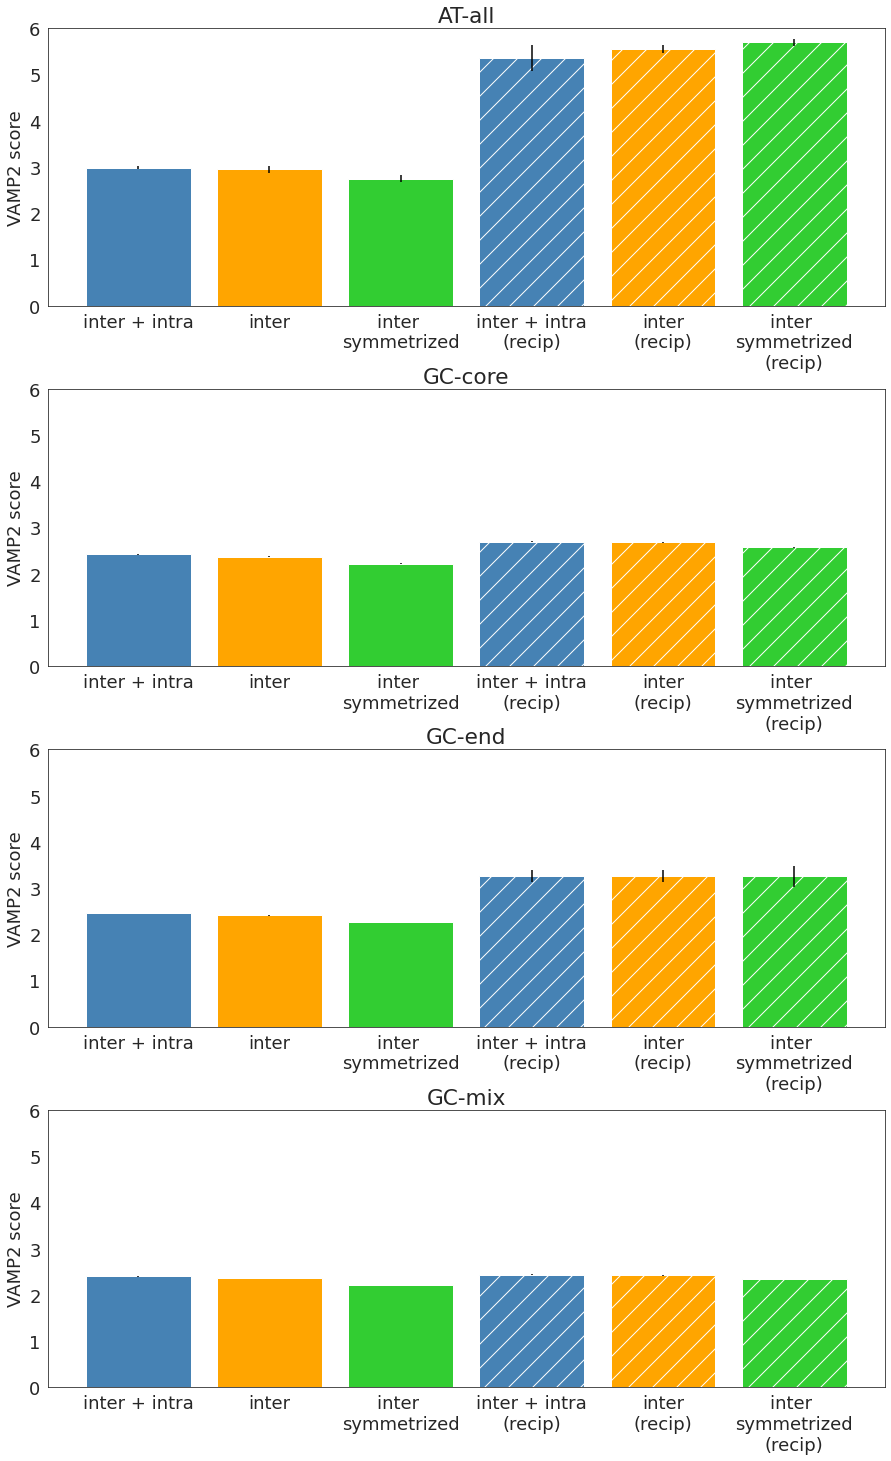

In [35]:
sns.set_style('white')
sns.set_palette('muted')
plt.rcParams['font.size'] = 18
colors = ['blue', 'orange', 'green']
seq_list = ['AT-all', 'GC-core', 'GC-end', 'GC-mix']

# load scores and errors

load_dir = 'nonpermute_scores/'
score_fs = sorted(glob.glob(f'{load_dir}*_scores.npy'))
error_fs = sorted(glob.glob(f'{load_dir}*_errors.npy'))

scores = [np.load(open(fs, 'rb')) for fs in score_fs]
errors = [np.load(open(fs, 'rb')) for fs in error_fs]

print(np.shape(scores), np.shape(errors))

# define score order for easier viewing
p_pwd = [0, 2, 4]
r_pwd = [1, 3, 5]
c_list = ['steelblue', 'orange', 'limegreen']

labels = ['inter + intra', 'inter', 'inter \nsymmetrized']
labels = labels + [label + '\n(recip)' for label in labels]
print(labels)

ind = np.arange(3)  # the x locations for the groups
ind_lab = np.arange(6) 
width = 0.8  # the width of the bars

fig, axes = plt.subplots(4, figsize=(15, 25), sharex=False, sharey=True)

for y in range(4):
    
    ax=axes[y]
    ax.set_title(seq_list[y])
    
    sy, ey  = scores[y][p_pwd], errors[y][p_pwd]
    ax.bar(ind + width*1.2, sy, width, yerr=ey, color=c_list)
    
    sy, ey  = scores[y][r_pwd], errors[y][r_pwd]
    ax.bar(3+ind + width*1.2, sy, width, yerr=ey, color=c_list, hatch='/')
        
    ax.set_ylabel("VAMP2 score")
    ax.set_ylim(0, 6)
    ax.set_xticks(ind_lab + width*1.2)
    ax.set_xticklabels(labels)

plt.subplots_adjust(hspace=0.3)
plt.savefig(f'../../paper_figs/all_permute_vamps_nolegend', dpi=300, bbox_inches='tight')